In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from struct import iter_unpack

In [2]:
def read(path):
    with open(path, 'rb') as f:
        return [x for x in iter_unpack('<Lff', f.read())]

In [21]:
solar   = pd.DataFrame(read('./data/solar'),   columns=['datetime', 'voltage (V)', 'current (mA)'])
battery = pd.DataFrame(read('./data/battery'), columns=['datetime', 'voltage (V)', 'current (mA)'])
solar   = solar[solar['datetime']>0]
battery = battery[battery['datetime']>0]
solar = solar.set_index('datetime')
solar.index = pd.to_datetime(solar.index, unit='s')
solar['power (mW)'] = solar['voltage (V)'] * solar['current (mA)']
battery = battery.set_index('datetime')
battery.index = pd.to_datetime(battery.index, unit='s')
battery['power (mW)'] = battery['voltage (V)'] * battery['current (mA)']

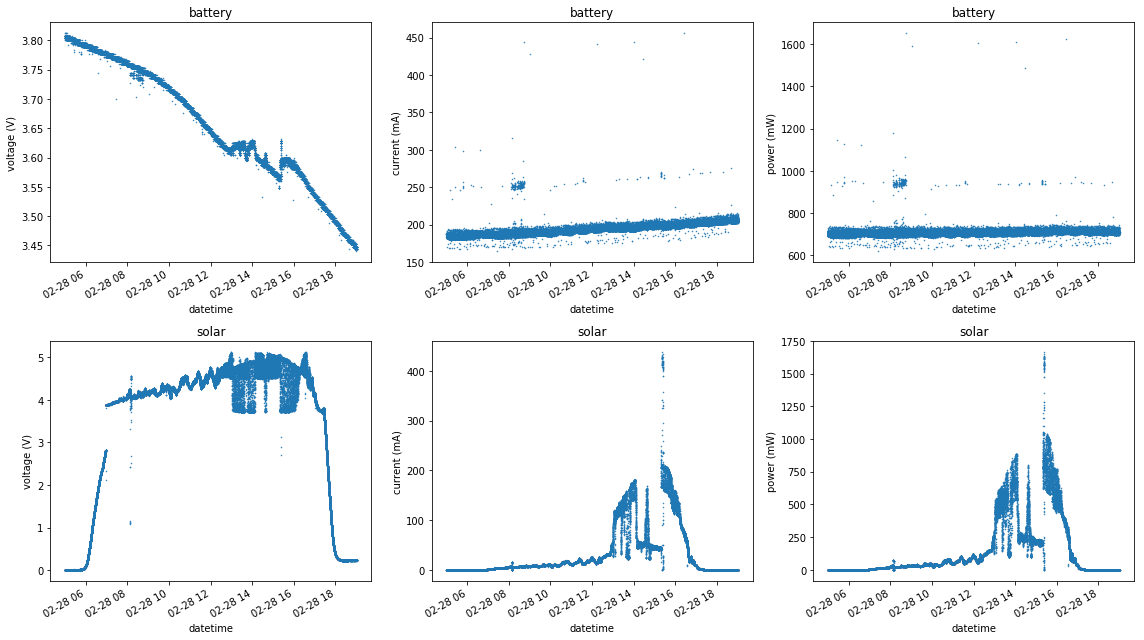

In [38]:
# from_ = '2018-02-28 05:00'
# to    = '2018-02-28 19:00'

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(16,9), sharex=True)

for i,x in enumerate([battery, solar]):
    for j in range(3):
        axes[i,j].set_title(['battery', 'solar'][i])
    axes[i,0].set_ylabel('voltage (V)')
    axes[i,1].set_ylabel('current (mA)')
    axes[i,2].set_ylabel('power (mW)')
    x.loc[from_:to, 'voltage (V)'].plot(ax=axes[i,0], style='.', markersize=1)
    x.loc[from_:to, 'current (mA)'].plot(ax=axes[i,1], style='.', markersize=1)
    x.loc[from_:to, 'power (mW)'].plot(ax=axes[i,2], style='.', markersize=1)

plt.tight_layout()
plt.show()